### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

## extraction scripts

In [4]:
def make_yearlist(yrst, yrend, dtype, tr, baseDir = '/gpfs/home/mep22dku/scratch/ModelRuns/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{tr}/ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

In [5]:
tnam = 'TOM12_TJ_SEA0'
yrst = 1948
yrend = 2006
mask = 'mask_band'
savenam = True

def extract_ts(tdir,yrst = 1948,yrend = 2019, mask = 'mask_band', savenam = True):
    
    
    sdir = '/gpfs/home/mep22dku/scratch/C14/CAL12_series_data/'
    print(f'qtrB14b_{tdir}_{yrst}_{yrend}_{masknam}_ts.nc')
    
    ylist = xr.open_mfdataset(make_yearlist(yrst, yrend, 'diad', tnam))
    print('opened')
    
    tmeshf = './obs/mmask.nc'
    tmesh = xr.open_dataset(tmeshf)
    area =  tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:] * tmesh[masknam][:,:]
    
    times = pd.date_range(f'{yrst}/01/01',f'{yrend}/12/31',freq='MS')

    qtrnewt_B = ylist.qtrB14b * area.values* 3.156e7 *2 *1e-14 *6.023e23*1e-26 #some horrible unit conversion taht corrine understands
    qtrnewt_C = ylist.qtrC14b * area.values* 3.156e7 *2 *1e-14 *6.023e23*1e-26 
    cflxnewt_D = ylist.Cflx * area.values* 3.156e7*12e-15  #mol/m2/s > pg/yr

    qtrnewt_B['time_counter'] = times
    qtrnewt_C['time_counter'] = times
    cflxnewt_D['time_counter'] = times

    qtrflx_mn_B = qtrnewt_B.sum(dim = ['x','y'])
    qtrflx_mn_C = qtrnewt_C.sum(dim = ['x','y'])
    cflxint_mn_D = cflxnewt_D.sum(dim = ['x','y'])

    if savenam:
        qtrflx_mn_B.to_netcdf(f'{sdir}/qtrB14b_{tdir}_{yrst}_{yrend}_{masknam}_ts.nc')
        qtrflx_mn_C.to_netcdf(f'{sdir}/qtrB14b_{tdir}_{yrst}_{yrend}_{masknam}_ts.nc')
        cflxint_mn_D.to_netcdf(f'{sdir}/cflx_{tdir}_{yrst}_{yrend}_{masknam}_ts.nc')
        print('saved')

In [6]:
ex = False

if ex:

    mask = 'mask_band'; savenam = True

    tnam = 'TOM12_TJ_SEA0'; yrst = 1948; yrend = 2006
    extract_ts(tnam,yrst = yrst,yrend = yrend, mask = mask, savenam = savenam)


## extractions occur in extract_depths.py and extract_b14.py 

## let's look at qtr etc


## seao, snao, sect, snct, 
## cea1, cna1, cec4, cnc4,

- get timeseries of qtrflx




In [7]:
prod = {
    'SNA0': {
        'col': 'royalblue', 'linestyle': '-', 'fnam': 'SNA0-NCEP A (spunup)',},
    'SNCT': {
        'col': 'royalblue', 'linestyle': ':', 'fnam': 'SNCT-NCEP C (spunup)',},
    
    'SEA0': {
        'col': 'red', 'linestyle': '-', 'fnam': 'SEA0-ERA A (spunup)',},
    'SECT': {
        'col': 'red', 'linestyle': ':', 'fnam': 'SECT-ERA C (spunup)',},    
    
    'CNA1': {
        'col': 'deepskyblue', 'linestyle': '-', 'fnam': 'CNA1-NCEP A (old)',},
    'CNC4': {
        'col': 'deepskyblue', 'linestyle': ':', 'fnam': 'SNCT-NCEP C (old)',},
    
    'CEA1': {
        'col': 'lightcoral', 'linestyle': '-', 'fnam': 'CEA1-ERA A (old)',},
    'CEC4': {
        'col': 'lightcoral', 'linestyle': ':', 'fnam': 'CEC4-ERA C (old)',},        

}

prodlist = ['SNA0','SNCT','SEA0','SECT','CNA1','CNC4','CEA1','CEC4']
pnew = ['SNA0','SNCT','SEA0','SECT']

Text(0.5, 0.98, 'mask band')

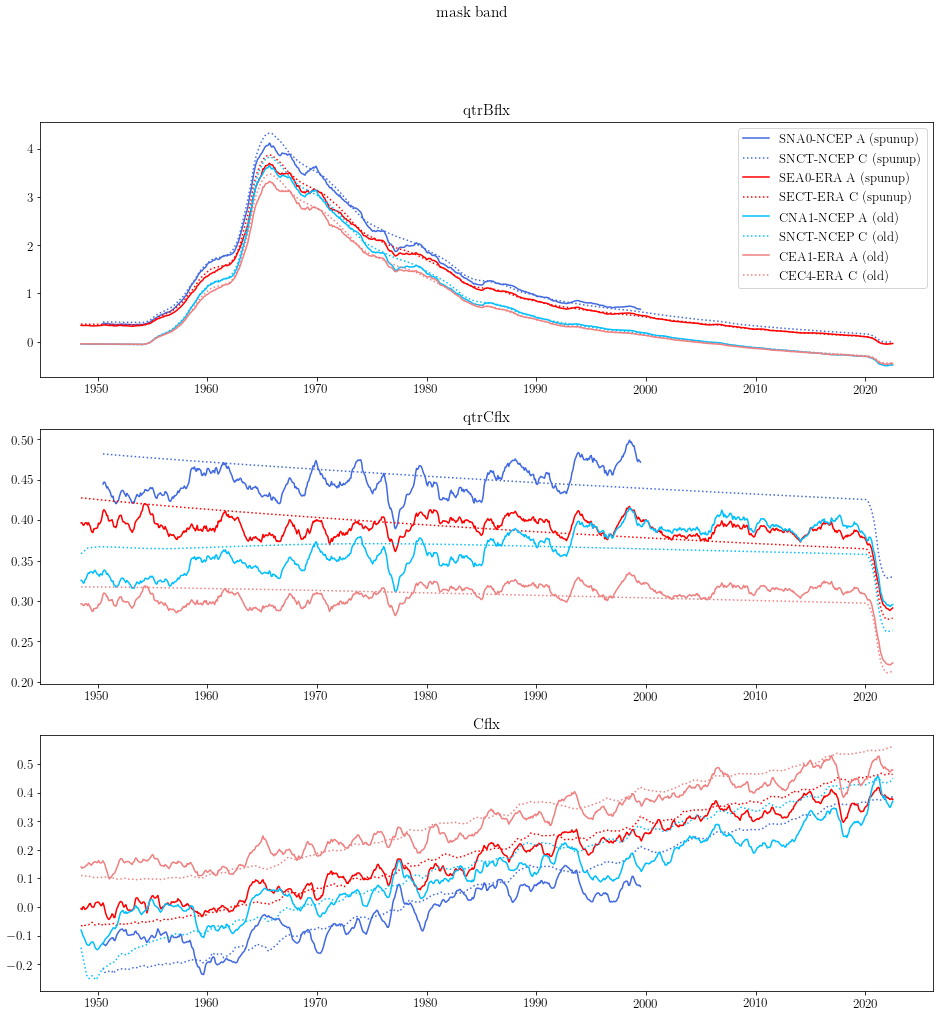

In [8]:
fact = 2
fig, axs = plt.subplots(3,1, figsize=(8*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

tdir = '/gpfs/home/mep22dku/scratch/C14/CAL12_series_data/'
for p in prodlist:
    
    qtrB = glob.glob(f'{tdir}/qtrB14b_TOM12_TJ_{p}*.nc')[0]
    try:
        qtrBf = xr.open_dataset(qtrB)
        qtrB_r = qtrBf.rolling(time_counter=12, center=True).mean()
        axs[0].plot(qtrB_r.time_counter, qtrB_r.qtrB14b, \
                    color = prod[p]['col'], linestyle = prod[p]['linestyle'],
                   label = prod[p]['fnam'])
    except:
        print(f'no qtrB for {p}')
    
    
    qtrC = glob.glob(f'{tdir}/qtrC14b_TOM12_TJ_{p}*.nc')[0]
    try:
        qtrCf = xr.open_dataset(qtrC)
        qtrC_r = qtrCf.rolling(time_counter=12, center=True).mean()
        axs[1].plot(qtrC_r.time_counter, qtrC_r.qtrC14b, \
                    color = prod[p]['col'], linestyle = prod[p]['linestyle'],
                   label = prod[p]['fnam'])
    except:
        print(f'no qtrC for {p}')
        
    cflx = glob.glob(f'{tdir}/cflx_TOM12_TJ_{p}*.nc')[0]
    try:
        cflxf = xr.open_dataset(cflx)
        cflx_r = cflxf.rolling(time_counter=12, center=True).mean()
        axs[2].plot(cflx_r.time_counter, cflx_r.Cflx, \
                    color = prod[p]['col'], linestyle = prod[p]['linestyle'],
                   label = prod[p]['fnam'])
    except:
        print(f'no cflx for {p}')
    
axs[0].legend(bbox_to_anchor = [1,1])

axs[0].set_title('qtrBflx')
axs[1].set_title('qtrCflx')
axs[2].set_title('Cflx')
plt.suptitle('mask band')

In [9]:
prodpair = {
    'SNA0': {
        'col': 'royalblue', 'linestyle': '-', 'fnam': 'NCEP (spunup)', 'crun' : 'SNCT'},
    
    'SEA0': {
        'col': 'red', 'linestyle': '-', 'fnam': 'ERA (spunup)', 'crun' : 'SECT'},

    'CNA1': {
        'col': 'deepskyblue', 'linestyle': '-', 'fnam': 'NCEP (old)', 'crun' : 'CNC4'},
    
    'CEA1': {
        'col': 'lightcoral', 'linestyle': '-', 'fnam': 'ERA (old)', 'crun' : 'CEC4'},
 

}

prodpairlist = ['SNA0','SEA0','CNA1','CEA1']#,'CNA1','CNC4','CEA1','CEC4']
pnew = ['SNA0','SNCT','SEA0','SECT']

Text(0.5, 0.98, 'mask band')

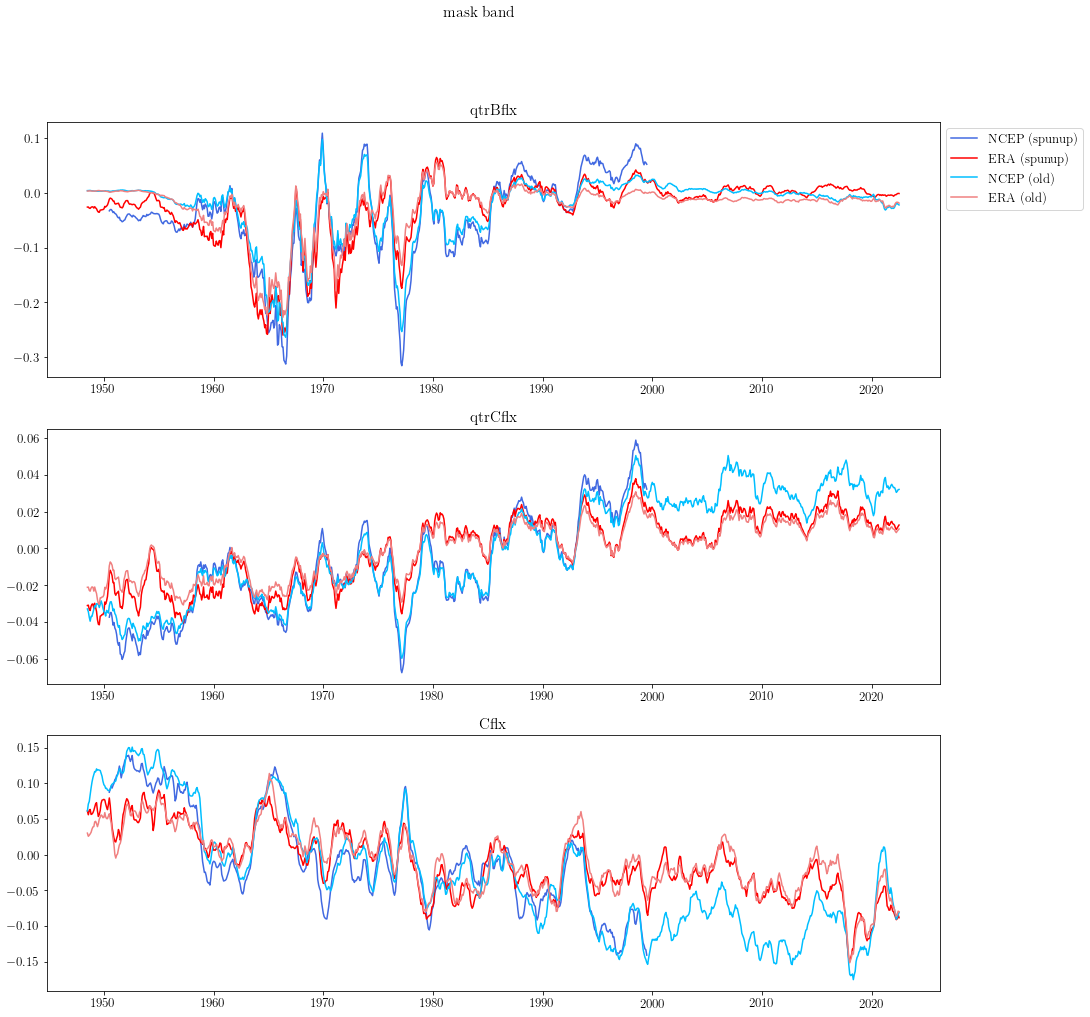

In [10]:
fact = 2
fig, axs = plt.subplots(3,1, figsize=(8*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

tdir = '/gpfs/home/mep22dku/scratch/C14/CAL12_series_data/'
for p in prodpairlist:
    
    c = prodpair[p]['crun']
    ts1 = xr.open_dataset(glob.glob(f'{tdir}/qtrB14b_TOM12_TJ_{p}*.nc')[0])
    ts2 = xr.open_dataset(glob.glob(f'{tdir}/qtrB14b_TOM12_TJ_{c}*.nc')[0])
    
    time1_start = ts1['time_counter'].min().values
    time1_end = ts1['time_counter'].max().values

    time2_start = ts2['time_counter'].min().values
    time2_end = ts2['time_counter'].max().values

    # Find the common time range
    start_time = max(time1_start, time2_start)
    end_time = min(time1_end, time2_end)

    # Select the data for both timeseries in the common time range
    ts1_common = ts1.sel(time_counter=slice(start_time, end_time))
    ts2_common = ts2.sel(time_counter=slice(start_time, end_time))
    
    qtrBf = ts1_common - ts2_common
    
    qtrB_r = qtrBf.rolling(time_counter=12, center=True).mean()
    axs[0].plot(qtrB_r.time_counter, qtrB_r.qtrB14b, \
                color = prodpair[p]['col'], linestyle = prod[p]['linestyle'],
               label = prodpair[p]['fnam'])
    
#####
    ts1 = xr.open_dataset(glob.glob(f'{tdir}/qtrC14b_TOM12_TJ_{p}*.nc')[0])
    ts2 = xr.open_dataset(glob.glob(f'{tdir}/qtrC14b_TOM12_TJ_{c}*.nc')[0])
    
    time1_start = ts1['time_counter'].min().values
    time1_end = ts1['time_counter'].max().values

    time2_start = ts2['time_counter'].min().values
    time2_end = ts2['time_counter'].max().values

    # Find the common time range
    start_time = max(time1_start, time2_start)
    end_time = min(time1_end, time2_end)

    # Select the data for both timeseries in the common time range
    ts1_common = ts1.sel(time_counter=slice(start_time, end_time))
    ts2_common = ts2.sel(time_counter=slice(start_time, end_time))
    
    qtrCf = ts1_common - ts2_common
    
    qtrC_r = qtrCf.rolling(time_counter=12, center=True).mean()
    axs[1].plot(qtrC_r.time_counter, qtrC_r.qtrC14b, \
                color = prodpair[p]['col'], linestyle = prod[p]['linestyle'],
               label = prodpair[p]['fnam'])
    
    
####
#####
    ts1 = xr.open_dataset(glob.glob(f'{tdir}/cflx_TOM12_TJ_{p}*.nc')[0])
    ts2 = xr.open_dataset(glob.glob(f'{tdir}/cflx_TOM12_TJ_{c}*.nc')[0])
    
    time1_start = ts1['time_counter'].min().values
    time1_end = ts1['time_counter'].max().values

    time2_start = ts2['time_counter'].min().values
    time2_end = ts2['time_counter'].max().values

    # Find the common time range
    start_time = max(time1_start, time2_start)
    end_time = min(time1_end, time2_end)

    # Select the data for both timeseries in the common time range
    ts1_common = ts1.sel(time_counter=slice(start_time, end_time))
    ts2_common = ts2.sel(time_counter=slice(start_time, end_time))
    
    qtrCf = ts1_common - ts2_common
    
    qtrC_r = qtrCf.rolling(time_counter=12, center=True).mean()
    axs[2].plot(qtrC_r.time_counter, qtrC_r.Cflx, \
                color = prodpair[p]['col'], linestyle = prod[p]['linestyle'],
               label = prodpair[p]['fnam'])
    
axs[0].legend(bbox_to_anchor = [1,1])

axs[0].set_title('qtrBflx')
axs[1].set_title('qtrCflx')
axs[2].set_title('Cflx')
plt.suptitle('mask band')

## b14, c14 ts - put into extract_b14.py

In [11]:
tmeshf = './obs/mmask.nc'
masknam = 'mask_band'
tmesh = xr.open_dataset(tmeshf)

ex = False
if ex:
    d = 0
    tarea = tmesh.tmask[0,d,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:] * tmesh[masknam][:,:]

    prodlist = ['SNA0','SNCT','SEA0','SECT','CNA1','CNC4','CEA1','CEC4']

    for p in prodlist:

        tdir = '/gpfs/home/mep22dku/scratch/C14/CAL12_series_data/'
        w = xr.open_dataset(glob.glob(f'{tdir}/TOM12_TJ_{p}*B14B.nc')[0])
        B14B_ts = w.B14B.isel(deptht = 0).weighted(tarea).mean(dim = ['x','y'])
        B14B_ts.to_netcdf(f'{tdir}/TOM12_TJ_{p}_B14B_ts.nc')

        w = xr.open_dataset(glob.glob(f'{tdir}/TOM12_TJ_{p}*C14B.nc')[0])
        C14B_ts = w.C14B.isel(deptht = 0).weighted(tarea).mean(dim = ['x','y'])
        C14B_ts.to_netcdf(f'{tdir}/TOM12_TJ_{p}_C14B_ts.nc')

Text(0.5, 1.0, 'C14')

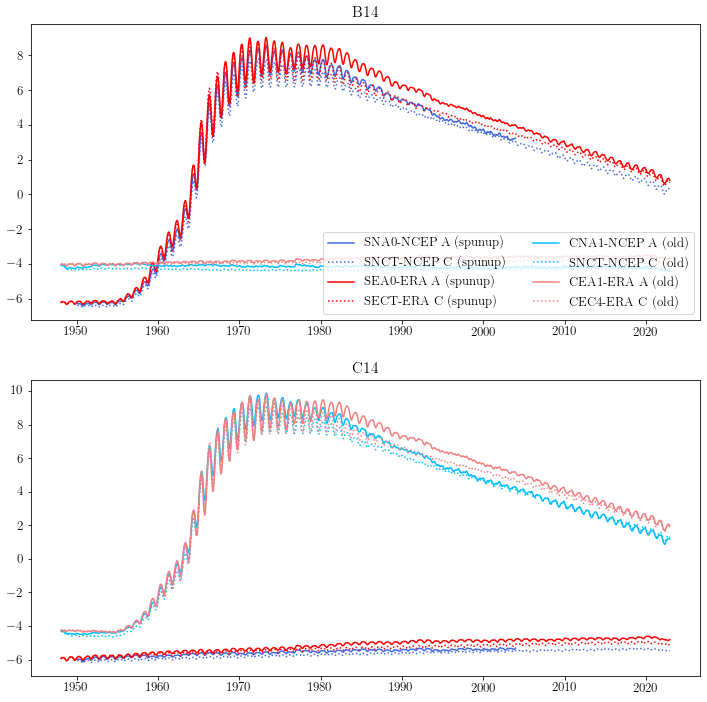

In [12]:
#TOM12_TJ_SNA0_C14B_ts.nc

fact = 1.5
fig, axs = plt.subplots(2,1, figsize=(8*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

prodlist = ['SNA0','SNCT','SEA0','SECT','CNA1','CNC4','CEA1','CEC4']

for p in prodlist:

    tdir = '/gpfs/home/mep22dku/scratch/C14/CAL12_series_data/'
    try:
        w = xr.open_dataset(f'{tdir}/TOM12_TJ_{p}_B14B_ts.nc')
        times = w.time_counter
        pandas_dates = pd.to_datetime([pd.Timestamp(date.year, date.month, date.day) for date in times.values])
        axs[0].plot(pandas_dates,w.B14B, color = prod[p]['col'], linestyle = prod[p]['linestyle'],
                   label = prod[p]['fnam'])
    except:
        print(f'no {p}')
        
    try:
        w = xr.open_dataset(f'{tdir}/TOM12_TJ_{p}_C14B_ts.nc')
        times = w.time_counter
        pandas_dates = pd.to_datetime([pd.Timestamp(date.year, date.month, date.day) for date in times.values])
        axs[1].plot(pandas_dates,w.C14B, color = prod[p]['col'], linestyle = prod[p]['linestyle'],
                   label = prod[p]['fnam'])
    except:
        print(f'no {p}')
        
axs[0].legend(loc = 'lower right', ncol = 2)
axs[0].set_title('B14')
axs[1].set_title('C14')